### Word Count 

#### To answer marketing manager's questions:

The first assumption is that the customer segment (sons, significant others, grandchildren, siblings, self, etc.) appeared in the reviews indicates who the toy was bought for.

* From the result of unique word count, we can see that "daughter and daughters" together occurred 6381 times, "son and sons" together occurred 6224 times, "grandson and grandsons" together occurred 3485 times in positive reviews. So, for positive reviews, the top 3 most frequently appeared customer segments are daughter, son, and grandson.

     For negative reviews, "son and sons" together occurred 559 times, "daughter and daughters" together occurred 371 times,  "grandson and grandsons" together occurred 145 times. So, for negative reviews, the top 3 most frequently appeared customer segments are son, daughter and grandson.

    You can also see the bar graphs in the python code below to have a more detailed customer segments information and how many times they appeared in reviews (Bar graphs are in the "Word Count for Positive Reviews" and "Word Count for Negative Reviews" sections).
    
    
* To analyze which customer segments' marketing messaging tends to outperform other segments, I considered the following factors:
    
    1. Customer segment word count in positive reviews, which shows how many likes from each customer segment
    2. Customer segment word count in negative reviews, which shows how many dislikes from each customer segment
    3. Review star (5 star for positive and 1 star for negative), which indicates level of satisfaction for each customer segment

    We could not just consider the word count in positive or negative reviews individually, because the cutomer segment that has the most positive reviews may also has the most negative reviews. In this case, we cannot say this customer segment outperforms or falls behind the others. 
    
    However, if we assumed that for each customer segment, the number of word counts is equal to the number of reviews and can somewhat represent the quantity of sales, then we can use the sum of word counts in both positive and negative reviews to evaluate sales for each customer segment. The larger the sum, the more toys were sold to the corresponding customer segment. Result for this approach is shown below:
    ```
     {'daughter': 6752,
 'granddaughter': 2488,
 'grandson': 3630,
 'nephew': 1171,
 'niece': 1030,
 'self': 127,
 'sibling': 886,
 'son': 6783}
    ```
    From the result, we can see that sales for "son" and "daughter" are far above the others. Therefore, according to this "sales" approach, I would conclude that son and daughter are the customer segments whose marketing messaging tend to outperform other segments. 
    
    What if the sales are high but reviews are poor? To solve this problem, we need to consider customer's level of satisfaction. To be specific, I want to see the average review star for each customer segment. Based on that, I made the following assumption: for each customer segment, the number of word counts is equal to the number of reviews.
    
    Then, I calculated the average review star for each customer segment. For example, "son" counts 6224 in positive reviews and 559 in negative reviews. Given 5 star for a positive review and 1 star for a negative review, the average review star for son is (5 x 6224 + 1 x 559) / (6224 + 559) = 4.67
    
    According to the average review star calculation method above, the result for each customer segment is shown below:
    ```
    {'daughter': 4.78,
 'granddaughter': 4.887,
 'grandson': 4.84,
 'nephew': 4.891,
 'niece': 4.864,
 'self': 4.37,
 'sibling': 4.828,
 'son': 4.67}
 ```
    From the result of average review star, we can see that nephew has the highest average review star, granddaughter ranks the second. Therefore, according to this evaluation approach, I would conclude that nephew and granddaughter are the customer segments whose marketing messaging tend to outperform other segments. 
    
    However, the average star approach cares more about level of satisfaction than about quantity of sales. Therefore, there is a trade-off between sales and level of satisfaction in this case. Which customer segment performs better depends on the goal of marketing. If the goal is to sell more, then the "sales" approach applies. If the goal is to have better reputation, then the "average star" approach applies. If the goal is both of them, then I would recommend to combine the marketing strategy for son and daughter (large sales volume) with the marketing strategy for nephew and granddaughter (better reputation).

## Below are the python code and comments for question B

### Word Count for Positive Reviews

In [2]:
# Import positive reviews
pos_review = open("good_amazon_toy_reviews.txt", "r")

In [3]:
# read lines
pos_review.seek(0)
lines = pos_review.readlines()

In [4]:
# count unique words
from collections import Counter

def word_counts(lines, delimiter):
    words = Counter()
    
    for line in lines:
        line = line.lower()
        for word in line.split(delimiter):
            words[word] += 1
    
    return words

In [5]:
pos_toy_word_counts = word_counts(lines, " ")

In [6]:
# sort words and counts in a descending order
import operator
sorted(pos_toy_word_counts.items(), key=operator.itemgetter(1), reverse = True)

[('the', 111394),
 ('and', 88165),
 ('a', 68776),
 ('to', 63788),
 ('it', 51931),
 ('i', 50472),
 ('for', 49173),
 ('', 44934),
 ('is', 42613),
 ('my', 42580),
 ('this', 40908),
 ('of', 36859),
 ('with', 29257),
 ('in', 26222),
 ('great', 20971),
 ('was', 20602),
 ('are', 18750),
 ('that', 18564),
 ('as', 18051),
 ('on', 18033),
 ('so', 17204),
 ('very', 16361),
 ('love', 15951),
 ('but', 15885),
 ('you', 15455),
 ('they', 14953),
 ('have', 14655),
 ('loves', 13407),
 ('we', 10654),
 ('he', 10451),
 ('all', 9967),
 ('not', 9915),
 ('these', 9836),
 ('just', 9765),
 ('one', 9762),
 ('be', 9703),
 ('she', 9668),
 ('little', 9345),
 ('can', 8879),
 ('old', 8858),
 ('at', 8726),
 ('like', 8634),
 ("it's", 8214),
 ('them', 8148),
 ('loved', 8019),
 ('good', 8017),
 ('has', 7938),
 ('her', 7831),
 ('/><br', 7715),
 ('will', 7702),
 ('year', 7643),
 ('fun', 7449),
 ('or', 7223),
 ('really', 7210),
 ('when', 7066),
 ('kids', 7046),
 ('up', 6882),
 ('had', 6488),
 ('would', 6410),
 ('well', 628

In [7]:
# list of customer segments
customers = ["son", "daughter", "grandson", "granddaughter", "niece", "nephew", "sibling", "self"]

In [8]:
# create a dictionary, where keys are customer segments and values are corresponding word count
pos_customer_count = {}
for i in customers:
    pos_customer_count[i] = pos_toy_word_counts[i] + pos_toy_word_counts[i+"s"]

# Change value for sibling (which includes sibling(s), sister(s), and brother(s))
pos_customer_count["sibling"] = pos_toy_word_counts["sibling"] + pos_toy_word_counts["siblings"] + \
pos_toy_word_counts["sister"] + pos_toy_word_counts["sisters"] + pos_toy_word_counts["brother"] + \
pos_toy_word_counts["brothers"]
pos_customer_count

{'daughter': 6381,
 'granddaughter': 2418,
 'grandson': 3485,
 'nephew': 1139,
 'niece': 995,
 'self': 107,
 'sibling': 848,
 'son': 6224}

In [9]:
# sort customer_count by value
sort_pos_customer_count = sorted(pos_customer_count.items(), key = operator.itemgetter(1), reverse = True)

In [10]:
# seperate customer list and their corresponding counts for further plotting
customer_list = [i[0] for i in sort_pos_customer_count]
customer_value = [i[1] for i in sort_pos_customer_count]

In [11]:
import matplotlib.pyplot as plt
import numpy as np

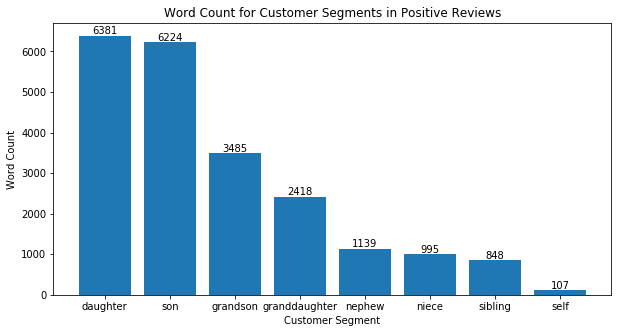

In [12]:
# Plot customer list and their corresponding counts in a descending order
x_labels = np.arange(len(customer_list))
plt.figure(figsize = (10,5))
plt.bar(x_labels, customer_value, align = "center")
plt.xticks(x_labels, customer_list)
plt.xlabel("Customer Segment")
plt.ylabel("Word Count")
plt.title("Word Count for Customer Segments in Positive Reviews")
for a,b in zip(x_labels, customer_value):
    plt.text(a, b, str(b), horizontalalignment = 'center', verticalalignment = 'bottom')
plt.show()

### Word Count for Negative Reviews

In [13]:
# Import positive reviews
neg_review = open("poor_amazon_toy_reviews.txt", "r")

In [14]:
# read lines
neg_review.seek(0)
lines = neg_review.readlines()

In [15]:
neg_toy_word_counts = word_counts(lines, " ")

In [16]:
# sort words and counts in a descending order
sorted(neg_toy_word_counts.items(), key=operator.itemgetter(1), reverse = True)

[('the', 21935),
 ('and', 11190),
 ('it', 10486),
 ('i', 10231),
 ('to', 9688),
 ('a', 9414),
 ('', 7343),
 ('not', 6793),
 ('of', 6762),
 ('this', 5561),
 ('is', 5505),
 ('was', 5489),
 ('for', 4916),
 ('in', 4248),
 ('my', 3557),
 ('with', 3170),
 ('that', 3045),
 ('on', 3018),
 ('but', 3008),
 ('very', 2674),
 ('are', 2426),
 ('they', 2412),
 ('have', 2265),
 ('you', 2226),
 ('as', 2190),
 ('one', 2158),
 ('so', 2143),
 ('be', 1787),
 ('we', 1742),
 ('would', 1740),
 ('had', 1717),
 ('at', 1688),
 ('were', 1533),
 ('all', 1490),
 ('like', 1490),
 ('just', 1403),
 ('when', 1378),
 ('out', 1312),
 ('get', 1291),
 ('only', 1284),
 ('even', 1277),
 ('no', 1253),
 ('these', 1246),
 ('if', 1221),
 ('them', 1215),
 ('from', 1187),
 ("don't", 1144),
 ('up', 1137),
 ('will', 1125),
 ('or', 1116),
 ('after', 1111),
 ('what', 1090),
 ('do', 1049),
 ('got', 1039),
 ('did', 977),
 ("didn't", 969),
 ("it's", 962),
 ('buy', 955),
 ('product', 951),
 ('bought', 912),
 ('your', 890),
 ('because', 87

In [17]:
# list of customer segments
customers = ["son", "daughter", "grandson", "granddaughter", "niece", "nephew", "sibling", "self"]

In [18]:
# create a dictionary, where keys are customer segments and values are corresponding word count
neg_customer_count = {}
for i in customers:
    neg_customer_count[i] = neg_toy_word_counts[i] + neg_toy_word_counts[i+"s"]

# Change value for sibling (which includes sibling(s), sister(s), and brother(s))
neg_customer_count["sibling"] = neg_toy_word_counts["sibling"] + neg_toy_word_counts["siblings"] + \
neg_toy_word_counts["sister"] + neg_toy_word_counts["sisters"] + neg_toy_word_counts["brother"] + \
neg_toy_word_counts["brothers"]
neg_customer_count

{'daughter': 371,
 'granddaughter': 70,
 'grandson': 145,
 'nephew': 32,
 'niece': 35,
 'self': 20,
 'sibling': 38,
 'son': 559}

In [19]:
# sort customer_count by value
sort_neg_customer_count = sorted(neg_customer_count.items(), key = operator.itemgetter(1), reverse = True)

In [20]:
# seperate customer list and their corresponding counts for further plotting
customer_list = [i[0] for i in sort_neg_customer_count]
customer_value = [i[1] for i in sort_neg_customer_count]

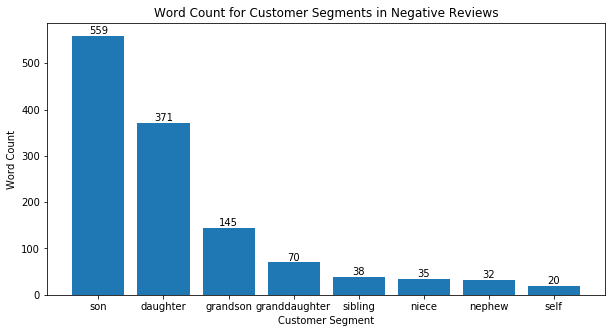

In [21]:
# Plot customer list and their corresponding counts in a descending order
x_labels = np.arange(len(customer_list))
plt.figure(figsize = (10,5))
plt.bar(x_labels, customer_value, align = "center")
plt.xticks(x_labels, customer_list)
plt.xlabel("Customer Segment")
plt.ylabel("Word Count")
plt.title("Word Count for Customer Segments in Negative Reviews")
for a,b in zip(x_labels, customer_value):
    plt.text(a, b, str(b), horizontalalignment = 'center', verticalalignment = 'bottom')
plt.show()

### "Sales" Approach

In [22]:
# count of customer segments in positive and negative reviews
print(pos_customer_count)
print(neg_customer_count)

{'son': 6224, 'daughter': 6381, 'grandson': 3485, 'granddaughter': 2418, 'niece': 995, 'nephew': 1139, 'sibling': 848, 'self': 107}
{'son': 559, 'daughter': 371, 'grandson': 145, 'granddaughter': 70, 'niece': 35, 'nephew': 32, 'sibling': 38, 'self': 20}


In [23]:
# sales for each customer segment
sales = {}
for i in pos_customer_count.keys():
    sales[i] = pos_customer_count[i] + neg_customer_count[i]
sales

{'daughter': 6752,
 'granddaughter': 2488,
 'grandson': 3630,
 'nephew': 1171,
 'niece': 1030,
 'self': 127,
 'sibling': 886,
 'son': 6783}

### "Average Stars" Approach

In [24]:
# count of customer segments in positive and negative reviews
print(pos_customer_count)
print(neg_customer_count)

{'son': 6224, 'daughter': 6381, 'grandson': 3485, 'granddaughter': 2418, 'niece': 995, 'nephew': 1139, 'sibling': 848, 'self': 107}
{'son': 559, 'daughter': 371, 'grandson': 145, 'granddaughter': 70, 'niece': 35, 'nephew': 32, 'sibling': 38, 'self': 20}


In [25]:
# average review star for each customer segment
# 5 star for positive review; 1 star for negative review
average_star = {}
for i in pos_customer_count.keys():
    average_star[i] = round((5 * pos_customer_count[i] + neg_customer_count[i]) / \
                            (pos_customer_count[i] + neg_customer_count[i]),3)
average_star

{'daughter': 4.78,
 'granddaughter': 4.887,
 'grandson': 4.84,
 'nephew': 4.891,
 'niece': 4.864,
 'self': 4.37,
 'sibling': 4.828,
 'son': 4.67}

### Battery

In [26]:
# word count of battery (battery and batteries) for positive and negative reviews
pos_battery_count = pos_toy_word_counts["battery"] + pos_toy_word_counts["batteries"]
neg_battery_count = neg_toy_word_counts["battery"] + neg_toy_word_counts["batteries"]

In [27]:
# Get total number of reviews for positive and negative reviews
pos_review.seek(0)
pos_lines = pos_review.readlines()
pos_total = len(pos_lines)

neg_review.seek(0)
neg_lines = neg_review.readlines()
neg_total = len(neg_lines)

In [28]:
# For the rest reviews that do not mention whether the toy requires battery, 
# assume a percentage of reviews with battery for further analysis
battery_per = np.linspace(0, 0.999, 100)

In [29]:
# Total count of battery for positive and negative reviews
pos_battery = pos_battery_count + battery_per * (pos_total - pos_battery_count)
neg_battery = neg_battery_count + battery_per * (neg_total - neg_battery_count)

In [30]:
# Total count of toys without battery for positive and negative reviews
pos_no_battery = pos_total - pos_battery
neg_no_battery = neg_total - neg_battery

In [31]:
# Average review star for toys with and without battery
ba_average = (5* pos_battery + neg_battery) / (pos_battery + neg_battery)
no_ba_average = (5 * pos_no_battery + neg_no_battery) / (pos_no_battery + neg_no_battery)

In [34]:
# Define a significant level. Assume that if the average review for toys with battery is lower than 
# 95% of average review for toys without battery, then they have significant difference
significant_per = 0.95

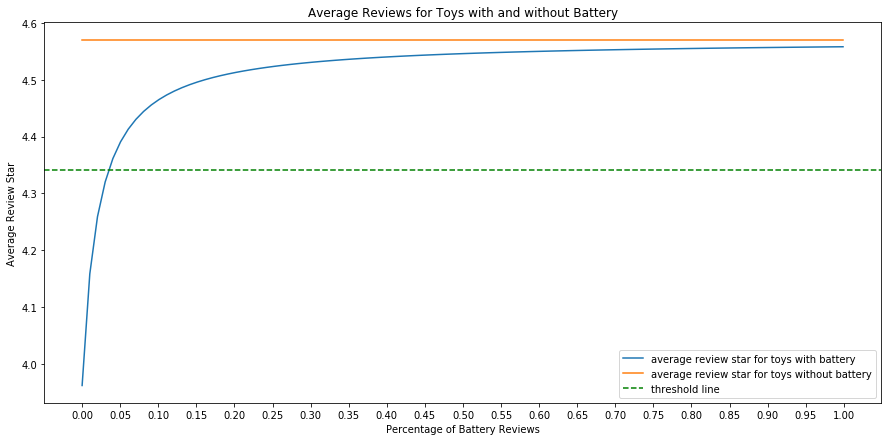

In [36]:
# Plot average review for toys with and without battery
# Also plot the threshold for determining whether they have significant difference
plt.figure(figsize = (15,7))
plt.plot(battery_per, ba_average, label = "average review star for toys with battery")
plt.plot(battery_per, no_ba_average, label = "average review star for toys without battery")
plt.xticks(np.arange(min(battery_per), max(battery_per) + 0.05, 0.05))
plt.axhline(significant_per*no_ba_average[0], color = "g", linestyle = "--", label = "threshold line")
plt.xlabel("Percentage of Battery Reviews")
plt.ylabel("Average Review Star")
plt.title("Average Reviews for Toys with and without Battery")
plt.legend()
plt.show()